In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# direktori datasets
dir = '/content/drive/MyDrive/nlp_project/imagedata'

In [2]:
# training dengan ImageDataGenerator
train = ImageDataGenerator(
                            rescale=1./255,
                            rotation_range=40,
                            horizontal_flip=True,
                            shear_range = 0.2,
                            zoom_range = 0.2,
                            fill_mode = 'nearest',
                            validation_split=0.2,
                            width_shift_range=0.2,
                            height_shift_range=0.2
                            )

# validasi dengan ImageDataGenerator
validation = ImageDataGenerator(
                                rescale=1./255,
                                validation_split=0.2
                                )

In [3]:
# training 80% datasets
train_generator = train.flow_from_directory(
                                            dir,
                                            target_size=(100, 100),
                                            batch_size=42,
                                            class_mode='sparse',
                                            shuffle=True,
                                            subset='training'
                                            )
# validasi 20% datasets
val_generator = validation.flow_from_directory(
                                            dir,
                                            target_size=(100, 100),
                                            batch_size=42,
                                            class_mode='sparse',
                                            shuffle=True,
                                            subset='validation'
                                            )

Found 9324 images belonging to 5 classes.
Found 2328 images belonging to 5 classes.


In [4]:
# membuat model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.4),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(5, activation='softmax')
                                    ])

In [5]:
# mengcompile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer= tf.optimizers.Adam(),
              metrics=['accuracy']
              )

In [6]:
# acuan penyetopan training jika akurasi mencapai ini
acc = 0.85

# Class callback
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > acc and logs.get('val_accuracy') > acc):
          print(f"\nTraining dihentikan, accuracy and val_accuracy > {acc}")   
          self.model.stop_training = True

# Memanggil class callback
callbacks = myCallback()

In [7]:
# training model
history = model.fit(
                    train_generator,
                    validation_data = val_generator,
                    steps_per_epoch=20,
                    epochs=500,
                    validation_steps=3,
                    verbose=1,
                    callbacks=[callbacks]
                    )

Epoch 1/500
20/20 [==============================] - 22s 1s/step - loss: 1.5514 - accuracy: 0.2798 - val_loss: 1.3710 - val_accuracy: 0.4048
Epoch 2/500
20/20 [==============================] - 21s 1s/step - loss: 1.3415 - accuracy: 0.3881 - val_loss: 1.1902 - val_accuracy: 0.4841
Epoch 3/500
20/20 [==============================] - 21s 1s/step - loss: 1.2822 - accuracy: 0.4452 - val_loss: 1.4576 - val_accuracy: 0.3810
Epoch 4/500
20/20 [==============================] - 21s 1s/step - loss: 1.2179 - accuracy: 0.4643 - val_loss: 1.2043 - val_accuracy: 0.4762
Epoch 5/500
20/20 [==============================] - 21s 1s/step - loss: 1.1301 - accuracy: 0.5226 - val_loss: 1.1031 - val_accuracy: 0.5476
Epoch 6/500
20/20 [==============================] - 21s 1s/step - loss: 1.1050 - accuracy: 0.5155 - val_loss: 1.0340 - val_accuracy: 0.5635
Epoch 7/500
20/20 [==============================] - 21s 1s/step - loss: 1.0890 - accuracy: 0.5310 - val_loss: 1.0622 - val_accuracy: 0.5714
Epoch 8/500
2

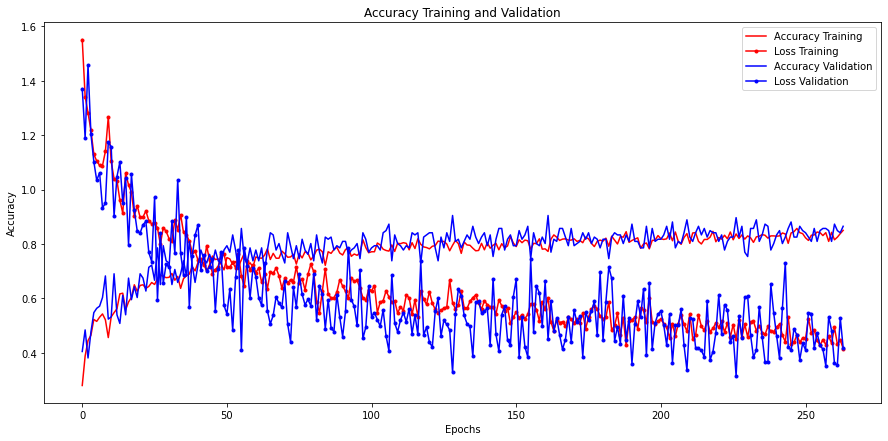

In [10]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.figure(figsize=(15, 7))
plt.plot(epochs, accuracy, 'r', label='Accuracy Training')
plt.plot(epochs, loss, 'r', marker='.', label='Loss Training')
plt.plot(epochs, val_accuracy, 'b', label='Accuracy Validation')
plt.plot(epochs, val_loss, 'b', marker='.', label='Loss Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Training and Validation')
plt.legend()

plt.show()

In [11]:
# konversi model hasil training ke tflite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
modeltflite = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(modeltflite)

INFO:tensorflow:Assets written to: /tmp/tmpc6f0j4dl/assets


Nama : Tomi Nurhidayat

E-mail : tomi.nurhidayat93@gmail.com